Description

In this file we perform an exploratory data analysis of our self-created dataset, as we didn't know what we might find. We have to make some minor adjustments to the data to be able to work with it. On top of that, we shift the undernourishment coloumn up by one for each country, so one row now contains the one-year-ahead undernourishment value. In the analysis we include a correlation matrix and we check the feature importances for the the random forest models (One containing all explaining variables and one containing only the most important ones).

In [2]:
# importing general necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Model and Scaling
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
# importing the dataset and making some adjustments so it works with the model and the time series split
df = pd.read_csv("../4)Data/combined_dataset_temp.csv").drop(columns=["Unnamed: 0", "GAUL", "M49"])
df["Casualties"] = df["Casualties"].fillna(0)
df["Undernourishment (%)"] = df["Undernourishment (%)"].replace({"<2.5": 0})

df["Undernourishment (%)"] = pd.to_numeric(df["Undernourishment (%)"]).shift(periods=-1)
df = df.drop(index=df.index[19::20])
df = df.dropna().sort_values("Year")

df["Undernourishment (%)"] = df["Undernourishment (%)"].apply(lambda x: x*10)
df["Undernourishment (%)"] = df["Undernourishment (%)"].astype(int)

In [4]:
# Creating X and y and scaling
sc = StandardScaler()

df_model_all_f = df.drop(columns=["Area", "Year"])
df_model_best_f = df.drop(columns=["Area", "Year", "GDP (MUSD)", "Food Prod. Index"])

df_model_x_all = sc.fit_transform(df_model_all_f[["GDP (MUSD)", "GNI (MUSD)", "Food Prod. Index", "Temperature", "Precipitation", "NDVI", "Casualties"]])
df_model_x_all = pd.DataFrame(df_model_x_all, columns=["GDP (MUSD)", "GNI (MUSD)", "Food Prod. Index", "Temperature", "Precipitation", "NDVI", "Casualties"])

df_model_x_best = sc.fit_transform(df_model_best_f[["GNI (MUSD)", "Temperature", "Precipitation", "NDVI", "Casualties"]])
df_model_x_best = pd.DataFrame(df_model_x_best, columns=["GNI (MUSD)", "Temperature", "Precipitation", "NDVI", "Casualties"])

df_model_y = sc.fit_transform(df_model_all_f["Undernourishment (%)"].array.reshape(-1, 1))
df_model_y = pd.DataFrame(df_model_y, columns=["Undernourishment (%)"])

X_all = df_model_x_all
X_best = df_model_x_best
y = df_model_y["Undernourishment (%)"]

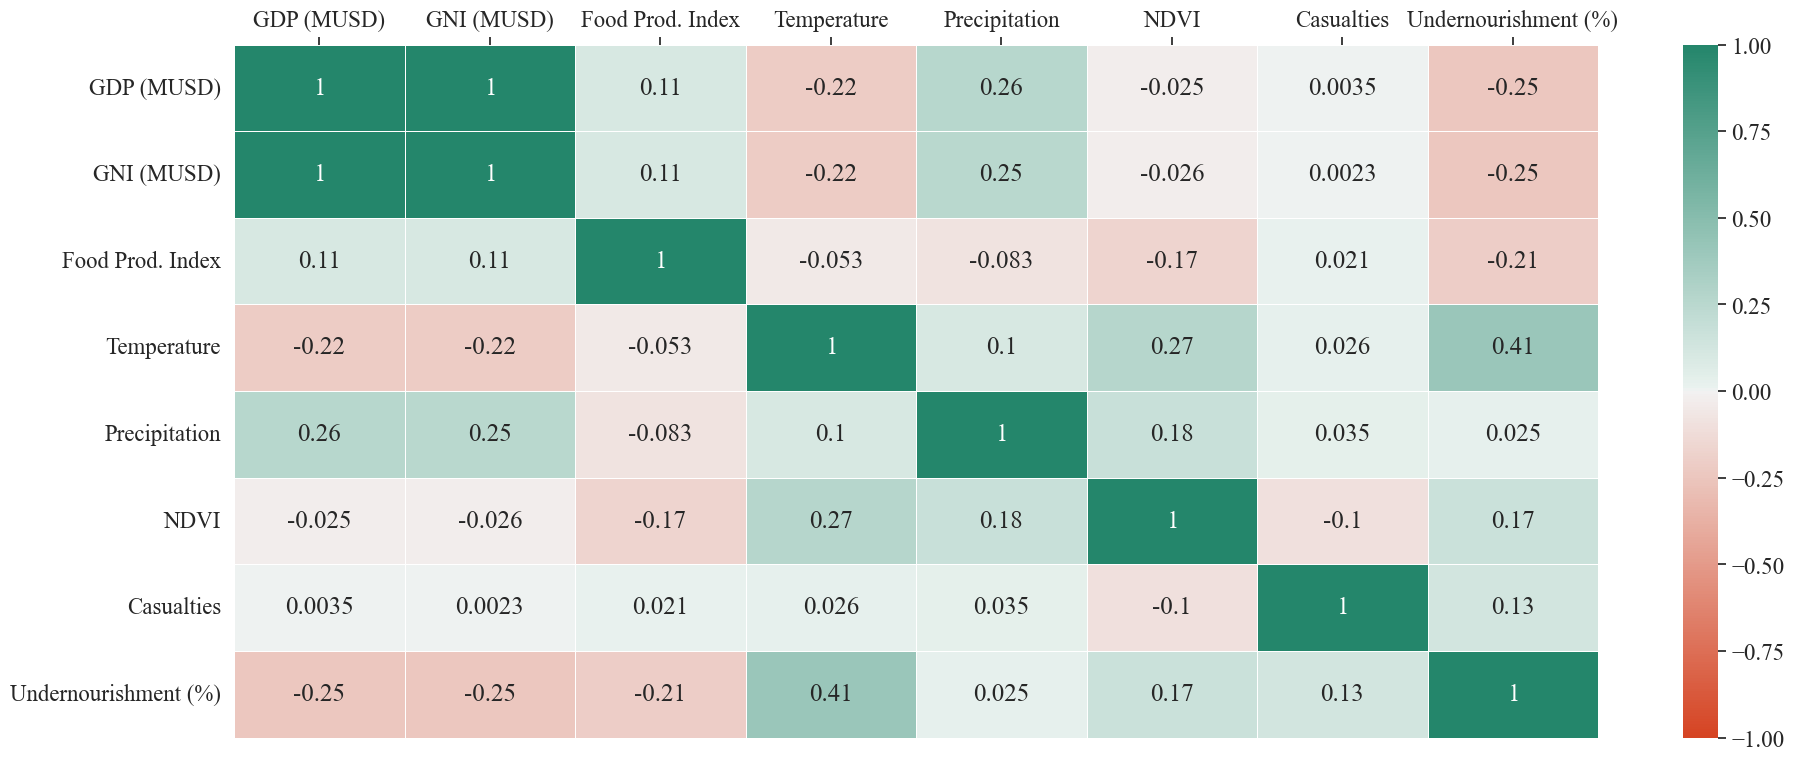

In [20]:
# correlations of each feature in the dataset including the target variable
corrmat = df_model_all_f.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,9))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap=sns.diverging_palette(377, 160, s=90, as_cmap=True),linewidth=.5, vmin=-1, vmax=1)
g.xaxis.tick_top()

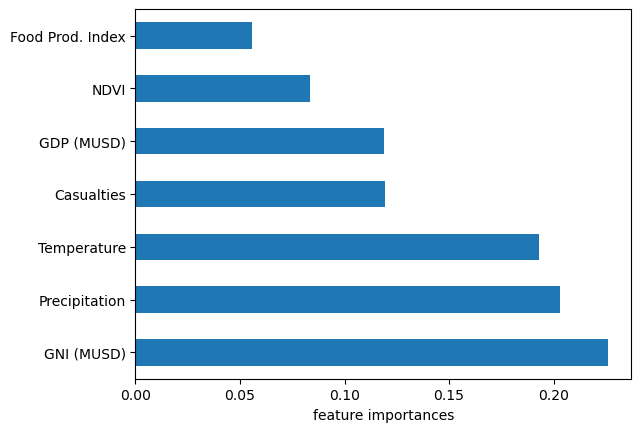

<Figure size 2000x2000 with 0 Axes>

In [6]:
# feature importances in the model later used (all features)
model = RandomForestRegressor()
model.fit(X_all, y)

feat_importances = pd.Series(model.feature_importances_, index=X_all.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.xlabel("feature importances")
plt.figure(figsize=(10, 10), dpi=200)
plt.show()

In [7]:
print(feat_importances)

GDP (MUSD)          0.119059
GNI (MUSD)          0.225962
Food Prod. Index    0.055901
Temperature         0.193034
Precipitation       0.203142
NDVI                0.083382
Casualties          0.119520
dtype: float64


[['GDP (MUSD)', 0.138768], ['Food Prod. Index', 0.05611], ['GNI (MUSD)', 0.204469], ['Temperature', 0.196587], ['Precipitation', 0.201643], ['NDVI', 0.083163], ['Casualties', 0.119259]]


[Text(0, 0, '0.204469'),
 Text(0, 0, '0.201643'),
 Text(0, 0, '0.196587'),
 Text(0, 0, '0.138768'),
 Text(0, 0, '0.119259'),
 Text(0, 0, '0.083163'),
 Text(0, 0, '0.05611')]

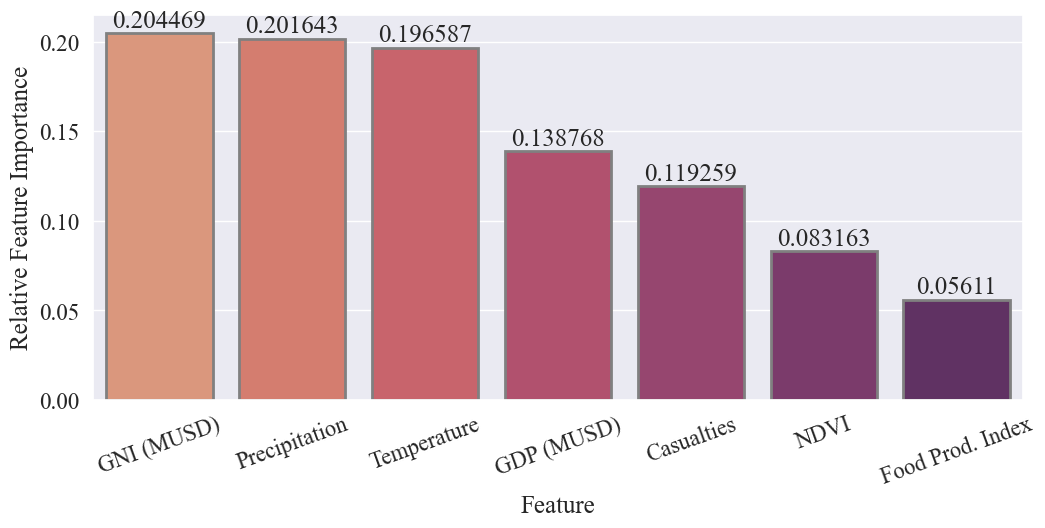

In [8]:
# Same data with another visualization
feature_list = [['GDP (MUSD)', 0.138768], 
    ['Food Prod. Index', 0.056110], 
    ['GNI (MUSD)', 0.204469], 
    ['Temperature', 0.196587], 
    ['Precipitation', 0.201643], 
    ['NDVI', 0.083163], 
    ['Casualties', 0.119259]]
feature_df = pd.DataFrame(feature_list, columns = ['Feature', 'Relative Feature Importance'])
print(feature_list)

feature_df = feature_df.sort_values(['Relative Feature Importance'], ascending=False)

sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.5)
plt.figure(figsize=(12, 5))
ax = sns.barplot(data = feature_df,x='Feature',y='Relative Feature Importance',palette="flare", capsize=.9,
linewidth=2, edgecolor="0.5")

for item in ax.get_xticklabels():
    item.set_rotation(20)

ax.bar_label(ax.containers[0])

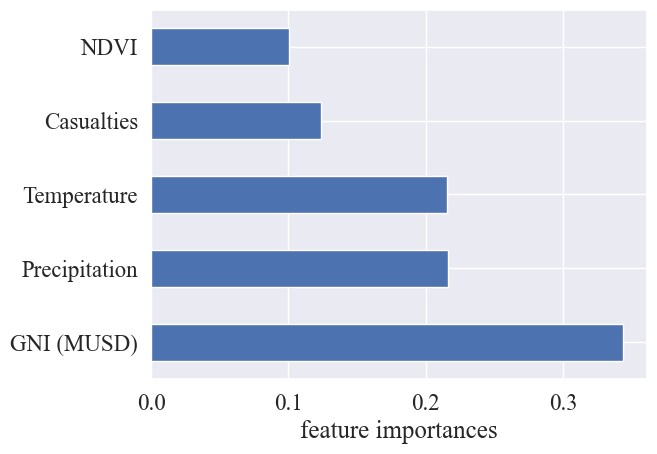

<Figure size 2000x2000 with 0 Axes>

In [9]:
# feature importances in the model later used (excluding GDP and Food Production Index)
model = RandomForestRegressor()
model.fit(X_best, y)

feat_importances = pd.Series(model.feature_importances_, index=X_best.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("feature importances")
plt.figure(figsize=(10, 10), dpi=200)
plt.show()

In [10]:
print(feat_importances)

GNI (MUSD)       0.343956
Temperature      0.215589
Precipitation    0.216080
NDVI             0.100399
Casualties       0.123976
dtype: float64


[['GNI (MUSD)', 0.340603], ['Temperature', 0.21902], ['Precipitation', 0.219676], ['NDVI', 0.097202], ['Casualties', 0.123499]]


[Text(0, 0, '0.340603'),
 Text(0, 0, '0.219676'),
 Text(0, 0, '0.21902'),
 Text(0, 0, '0.123499'),
 Text(0, 0, '0.097202')]

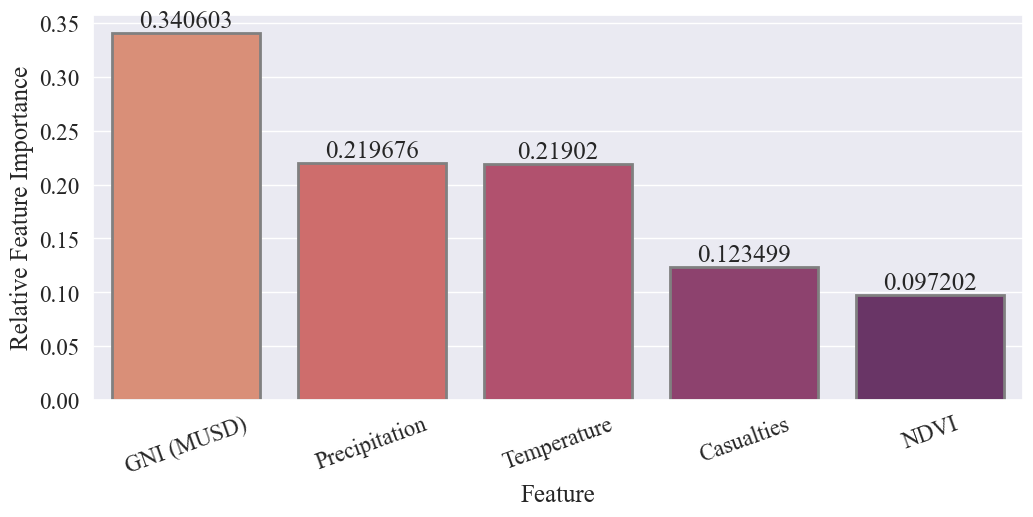

In [11]:
# Same data with another visualization
feature_list = [['GNI (MUSD)', 0.340603], ['Temperature', 0.219020], ['Precipitation',0.219676], ['NDVI',0.097202], ['Casualties',0.123499]]
feature_df = pd.DataFrame(feature_list, columns = ['Feature', 'Relative Feature Importance'])
print(feature_list)

feature_df = feature_df.sort_values(['Relative Feature Importance'], ascending=False)

sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.5)
plt.figure(figsize=(12, 5))
ax = sns.barplot(data = feature_df,x='Feature',y='Relative Feature Importance',palette="flare", capsize=.9,
linewidth=2, edgecolor="0.5")

for item in ax.get_xticklabels():
    item.set_rotation(20)

ax.bar_label(ax.containers[0])
